# **Pengenalan Dataset**

In [2]:
import pandas as pd

dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id  ...    brand quantity item_price
0   1703458  2019-10-17        14004  ...  BRAND_J       10     740000
1   1706815  2019-10-24        17220  ...  BRAND_R        2     604000
2   1710718  2019-11-03        16518  ...  BRAND_C        8    1045000
3   1683592  2019-08-19        16364  ...  BRAND_A        4     205000
4   1702573  2019-10-16        15696  ...  BRAND_R        2    4475000

[5 rows x 9 columns]


# **Penambahan Kolom Order Month pada Dataset**

In [4]:
import datetime

dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id  ... quantity item_price order_month
0   1703458  2019-10-17        14004  ...       10     740000     2019-10
1   1706815  2019-10-24        17220  ...        2     604000     2019-10
2   1710718  2019-11-03        16518  ...        8    1045000     2019-11
3   1683592  2019-08-19        16364  ...        4     205000     2019-08
4   1702573  2019-10-16        15696  ...        2    4475000     2019-10

[5 rows x 10 columns]


# **Penambahan Kolom GMV pada Dataset**
Selanjutnya, bagaimana dengan GMV? Definisikan GMV adalah perkalian setiap entri di kolom item_price dan kolom quantity. Bisa saja menggunakan fungsi apply & lambda seperti tadi, tetapi ada cara yang lebih mudah yaitu dengan mengalikan kedua kolom yang disebutkan secara langsung.

In [6]:
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

print(dataset.head())

   order_id  order_date  customer_id  ... item_price order_month      gmv
0   1703458  2019-10-17        14004  ...     740000     2019-10  7400000
1   1706815  2019-10-24        17220  ...     604000     2019-10  1208000
2   1710718  2019-11-03        16518  ...    1045000     2019-11  8360000
3   1683592  2019-08-19        16364  ...     205000     2019-08   820000
4   1702573  2019-10-16        15696  ...    4475000     2019-10  8950000

[5 rows x 11 columns]


# **Membuat Data Agregat**

In [4]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


# **Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV**

Cara standar untuk menggunakan matplotlib yaitu dengan memanggil function plt.plot lalu definisikan nilai di sumbu-x dan sumbu-y. Dalam hal ini, definisikan kolom order_month di sumbu-x (parameter pertama), dan kolom gmv di sumbu-y (parameter kedua). Setelah selesai mendefinisikan komponen chart-nya, lalu panggil plt.show()untuk menampilkan grafiknya.

In [16]:
# import matplotlib.pyplot as plt
import plotly.express as px

monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
# plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
# plt.show()

fg = px.line(monthly_amount, x="order_month", y='gmv')
fg.show()



# **Cara Alternatif: Fungsi .plot() pada pandas Dataframe**
Dengan pendekatan lain, dimungkinkan juga melakukan visualisasi dengan matplotlib tanpa membuat variabel baru.



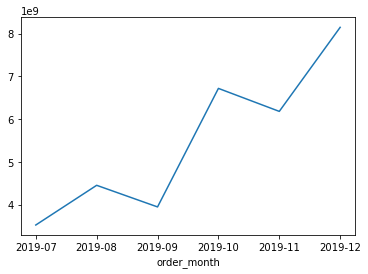

In [14]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

# **Mengubah Figure Size**

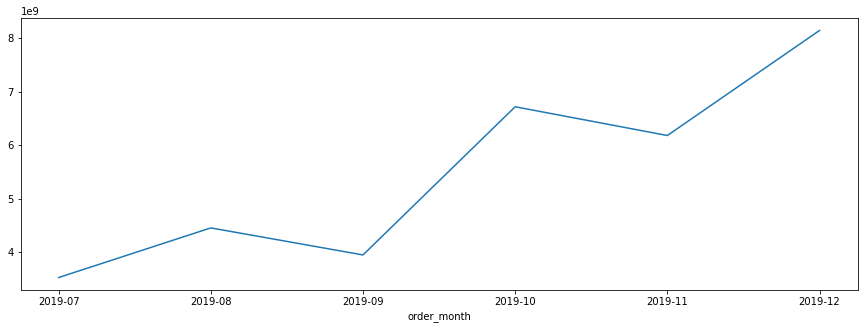

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

# **Menambahkan Title and Axis Labels**

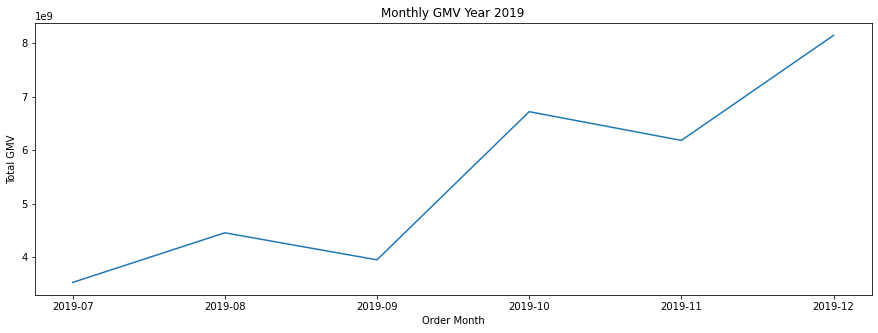

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

# **Kustomisasi Title and Axis Labels**

* loc: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka defaultnya title ada di tengah.

* pad: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.

* fontsize: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).

* color: digunakan untuk mengganti warna huruf judul. 

Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.
Untuk xlabel dan ylabel, kita bisa mengganti fontsize dan color, tetapi tidak bisa mengganti loc.

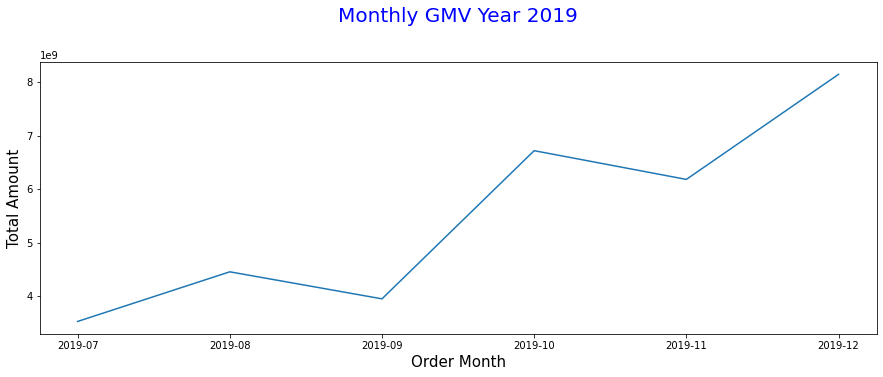

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

# **Kustomisasi Line dan Point**

Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:

* color: mengubah warnanya (sama seperti di title)

* linewidth: mengubah ketebalan line/garisnya (dalam satuan px)

* linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.

* marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

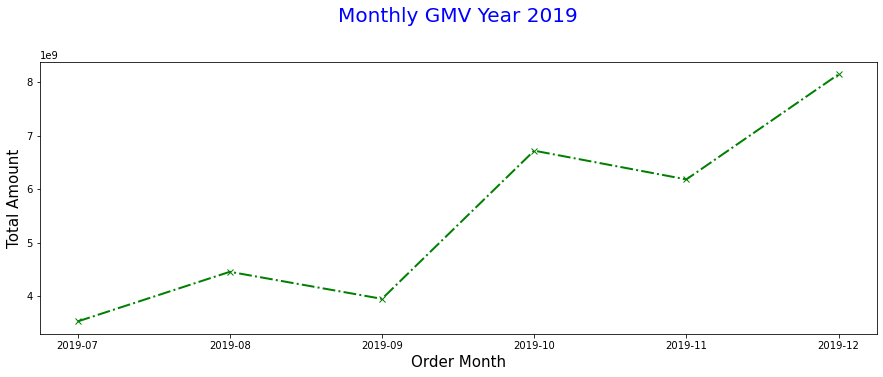

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

# **Kustomisasi Grid**

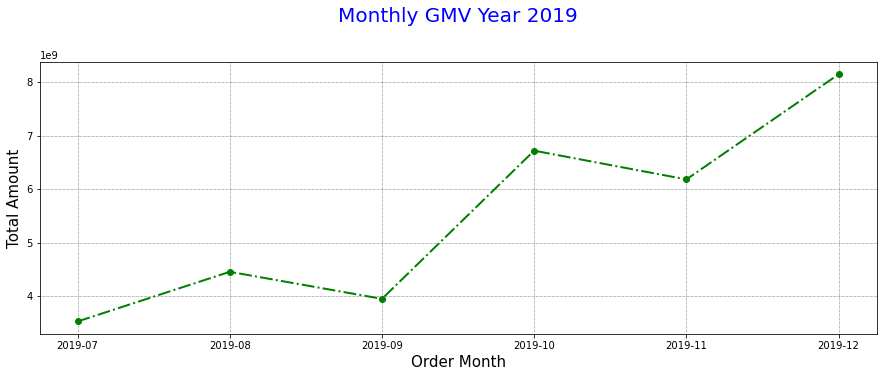

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='black', linestyle='dotted', linewidth=0.5)
plt.show()

# **Kustomisasi Axis Ticks**

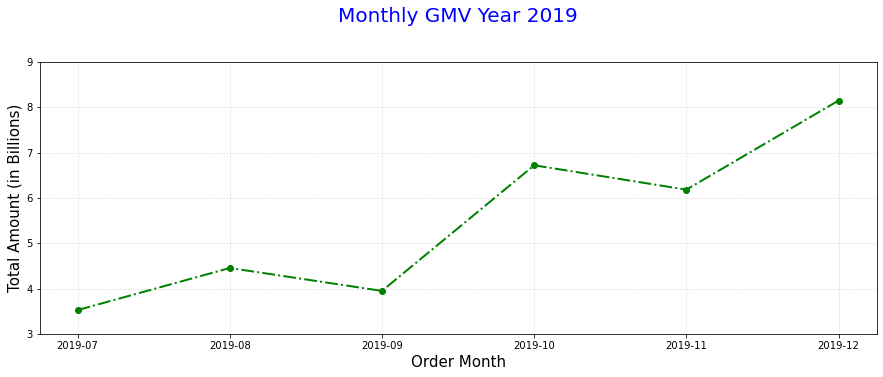

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

# **Menentukan Batas Minimum dan Maksimum Axis Ticks**

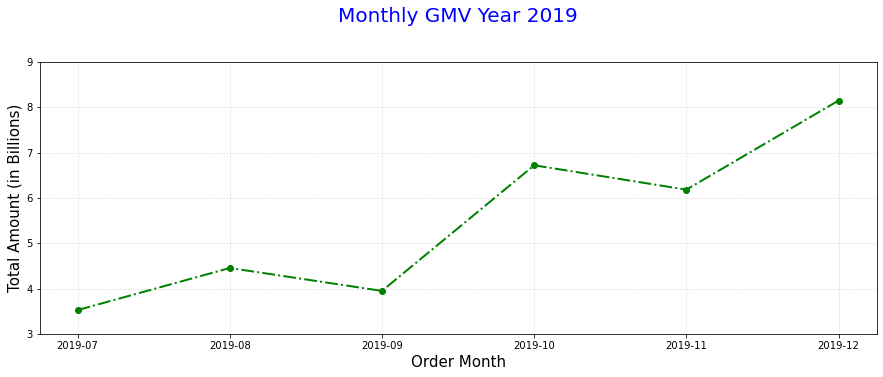

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

# **Menambahkan Informasi Pada Plot**

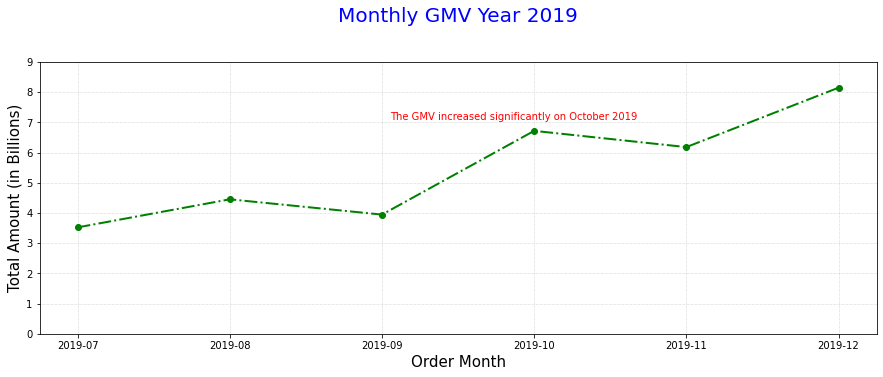

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019 ', transform=fig.transFigure, color='red')
plt.show()

# **Menyimpan Hasil Plot Menjadi File Image**

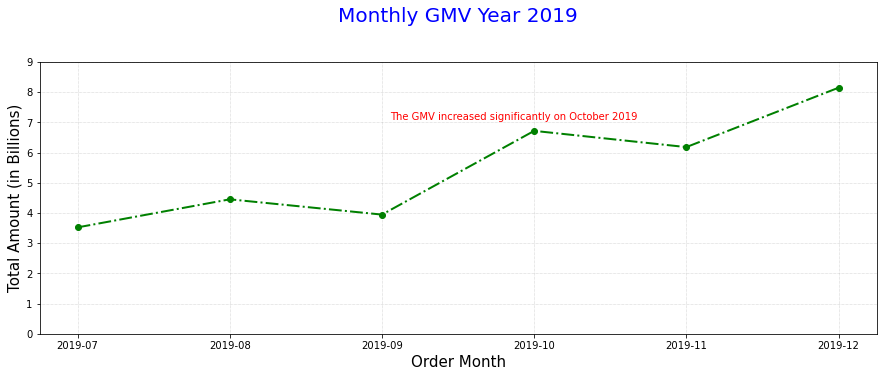

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png')
plt.show()

# **Pengaturan Parameter untuk Menyimpan Gambar**

Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:

* dpi: Resolusi gambar (dots per inch). 

* quality: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).

* facecolor: Memberikan warna bagian depan figure, di luar area plot 
edgecolor: Memberikan warna pinggiran gambar

* transparent: Jika nilainya True, maka gambarnya jadi transparan (jika filenya png)
 

Tapi biasanya, parameter-parameter ini tidak digunakan karena grafik di file gambar bisa jadi berbeda dengan yang muncul saat menjalankan code di python.

 

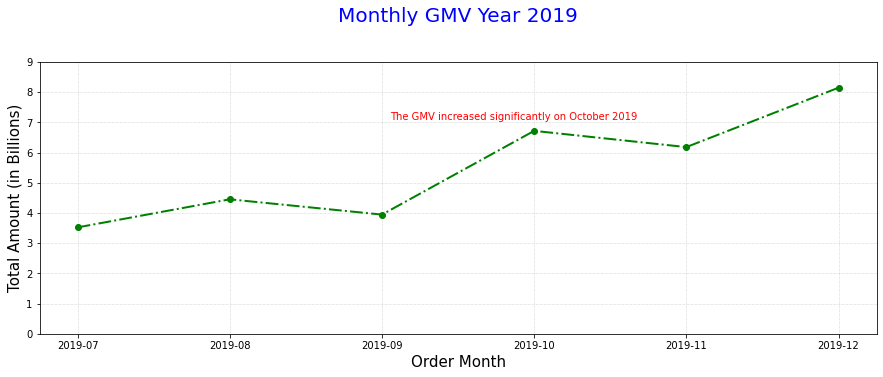

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png', quality=95)
plt.show()

# **Membuat Multi-Line Chart**

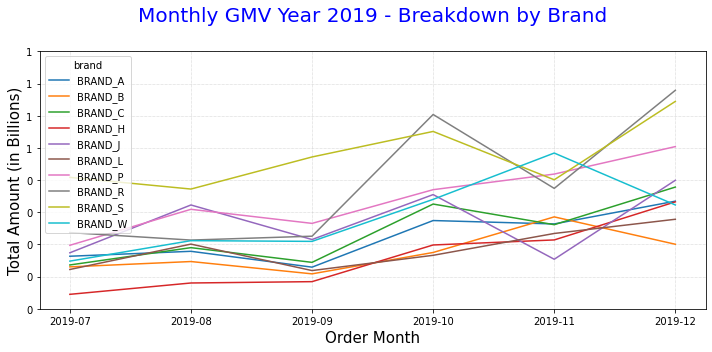

In [65]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# **Kustomisasi Legend**

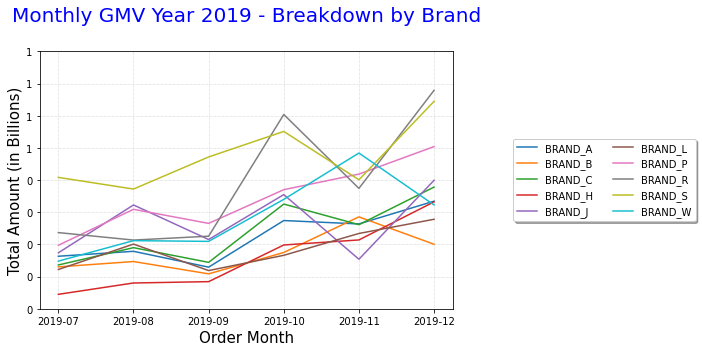

In [71]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.ylim(ymin=0)
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right',bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

# **Kustomisasi Colormap**

<Figure size 432x288 with 0 Axes>

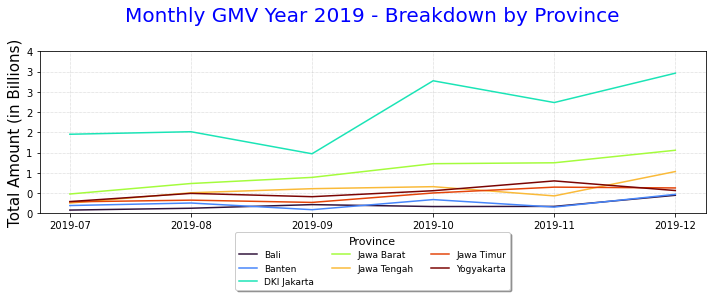

In [73]:
import matplotlib.pyplot as plt
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='turbo')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province',fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# **Membuat Line Chart GMV Breakdown by Top Provinces**

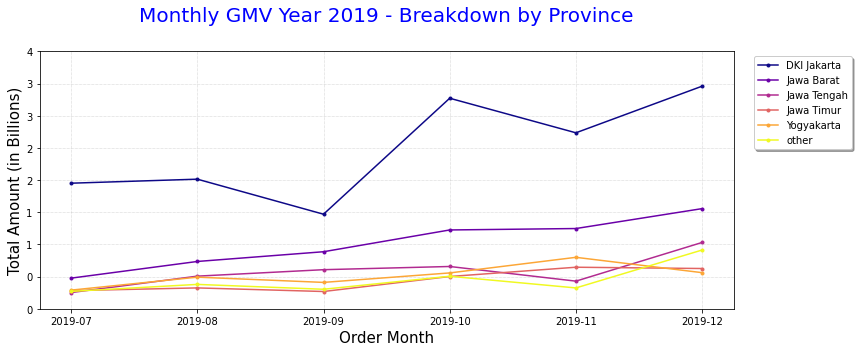

In [75]:
import matplotlib.pyplot as plt

top_provinces = (dataset.groupby('province')['gmv'].sum().reset_index().sort_values(by='gmv',ascending=False).head(5))

dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')

plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

# **Membuat Anotasi**

Untuk membuat annotate, gunakan function  plt.annotate. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.

Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:

* xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)

* arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:

  * arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.

  * connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.

  * color: menentukan warna dari panah

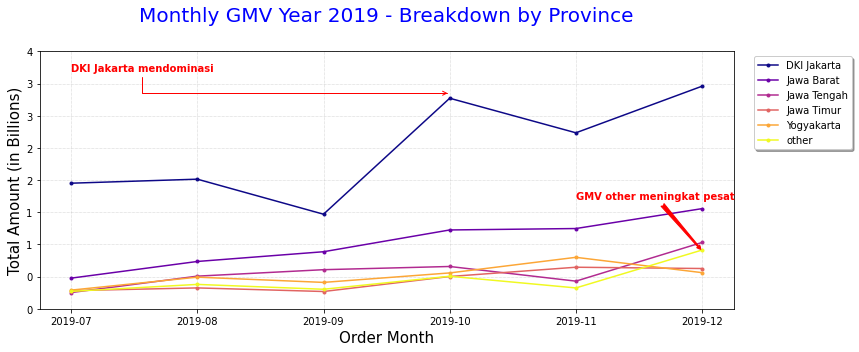

In [21]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
xytext=(4, 1700000000), weight='bold', color='red',
arrowprops=dict(arrowstyle='fancy',
connectionstyle="arc3",
color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
xytext=(0, 3700000000), weight='bold', color='red',
arrowprops=dict(arrowstyle='->',
connectionstyle="angle",
color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

# **Membuat Subset Data**

In [78]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id  ... order_month      gmv province_top
0   1703458  2019-10-17        14004  ...     2019-10  7400000  DKI Jakarta
1   1706815  2019-10-24        17220  ...     2019-10  1208000  DKI Jakarta
2   1710718  2019-11-03        16518  ...     2019-11  8360000  DKI Jakarta
4   1702573  2019-10-16        15696  ...     2019-10  8950000  DKI Jakarta
6   1711399  2019-11-04        16791  ...     2019-11  1465000  DKI Jakarta

[5 rows x 12 columns]


# **Membuat Pie Chart**

Beberapa parameter yang bisa dimodifikasi:

* labels: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.

* colors: array yang berisikan warna untuk masing-masing bagian pie.
autopct: format untuk nilai persentasi yang ditampilkan, bisa berupa string atau function.

* shadow: jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False.

* radius: jari-jari dari pie-chart

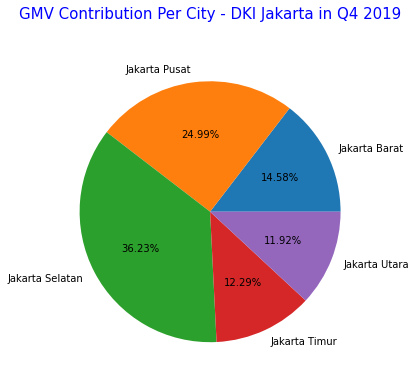

In [91]:
import matplotlib.pyplot as plt

dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()

plt.figure(figsize=(6,6), facecolor='white')
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.show()

# **Membuat Bar Chart**


<Figure size 432x288 with 0 Axes>

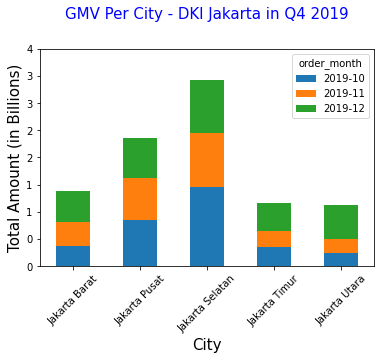

In [107]:
import matplotlib.pyplot as plt

plt.clf()

dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
labels, locations = plt.yticks()

plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.ylim(ymin=0)
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.show()

# **Membuat Multi-Bar Chart**

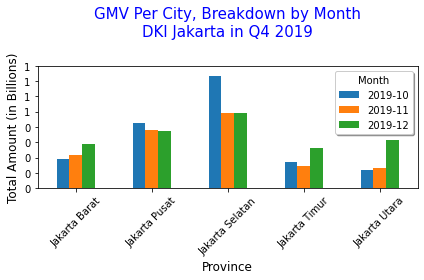

In [25]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Membuat Stacked Chart**

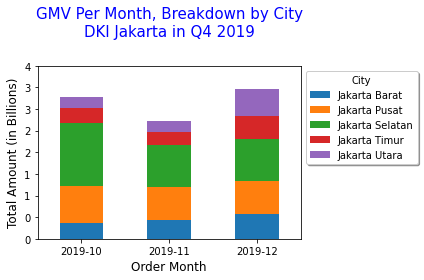

In [26]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1,title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Membuat Agregat Data Customer**

In [27]:
data_per_customer = (dataset_dki_q4.groupby('customer_id')
.agg({'order_id':'nunique',
'quantity': 'sum',
'gmv':'sum'})
.reset_index()
.rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders',ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


# **Membuat Histogram - Part 1**

<Figure size 432x288 with 0 Axes>

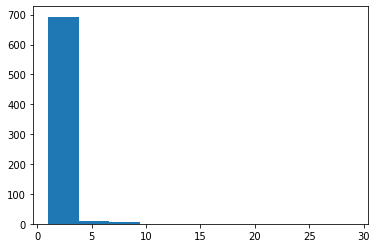

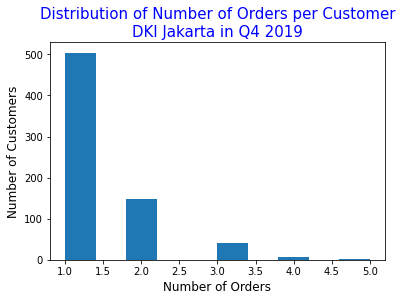

In [28]:
import matplotlib.pyplot as plt
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

# **Membuat Histogram - Part 2**

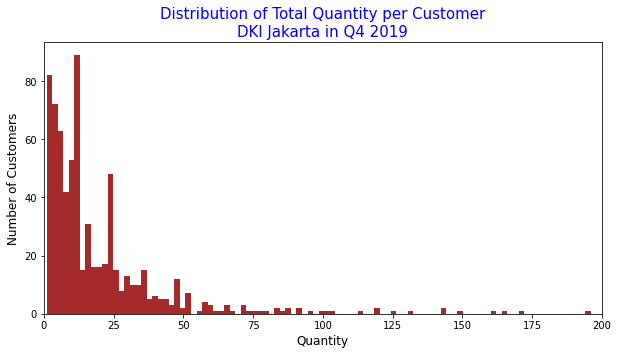

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customers',fontsize = 12)
plt.xlim(xmin=0,xmax=200)
plt.show()

# **Membuat Histogram - Part 3**


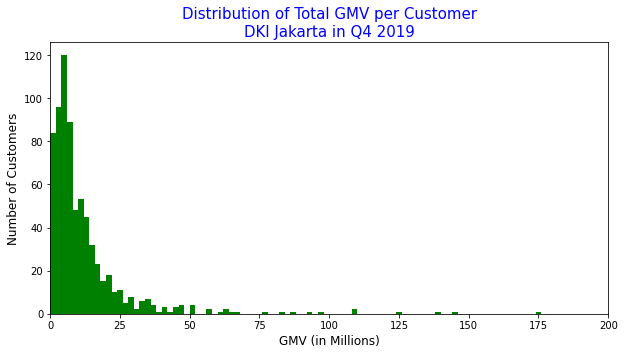

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers',fontsize = 12)
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

# **Membuat Scatterplot**

<Figure size 432x288 with 0 Axes>

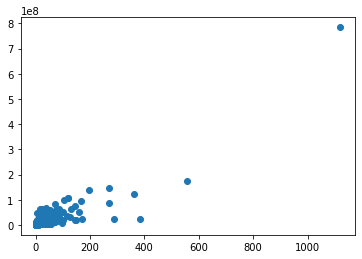

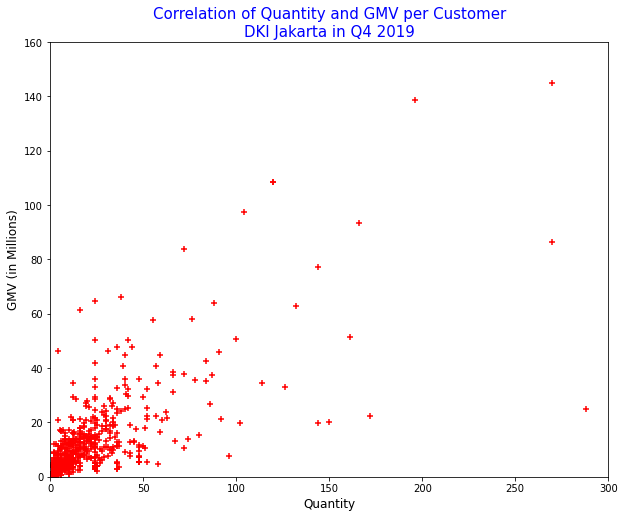

In [31]:
import matplotlib.pyplot as plt
plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()